TypeError: Invalid shape (126, 64, 64, 3) for image data

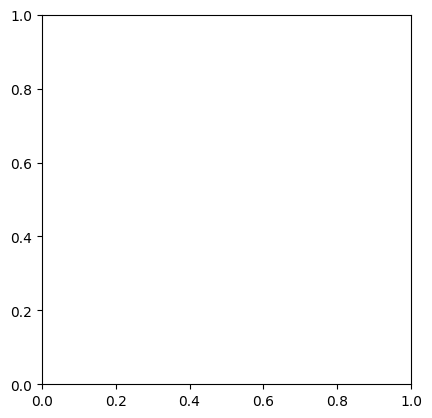

In [6]:
import numpy as np
from PIL import Image

# Load the image
image = Image.open("Downloads/Activity_Airbnb.jpg")

# Define the block size
block_size = 64

# Convert the image to a NumPy array
image_array = np.array(image)

# Compute the number of blocks along each axis
num_blocks_x = image_array.shape[1] // block_size
num_blocks_y = image_array.shape[0] // block_size

# Reshape the image array into a 4D array of subimages
subimages = np.reshape(image_array[:num_blocks_y * block_size, :num_blocks_x * block_size],
                       (num_blocks_y, block_size, num_blocks_x, block_size, 3))
subimages = np.transpose(subimages, (0, 2, 1, 3, 4))
subimages = np.reshape(subimages, (-1, block_size, block_size, 3))
plt.imshow(subimages)

In [9]:
import matplotlib.pyplot as plt

In [45]:
from PIL import Image

# load the image
image = Image.open('Downloads/6aofsvaglm_Medium_WW226365.jpg')

# get the width and height of the image
width, height = image.size

# crop the image into 4 equal parts
block1 = image.crop((0, 0, width//2, height//2))
block2 = image.crop((width//2, 0, width, height//2))
block3 = image.crop((0, height//2, width//2, height))
block4 = image.crop((width//2, height//2, width, height))


#plt.imshow(block1)


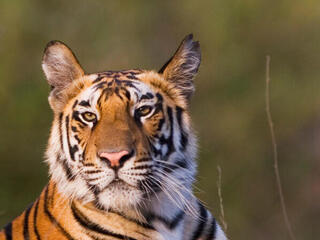

In [47]:
block2

In [38]:
width//2

320

In [44]:
height//2

240

In [ ]:
0,0,320,240

In [11]:
import random

# create a list of the 4 blocks
blocks = [block1, block2, block3, block4]

# shuffle the blocks
random.shuffle(blocks)


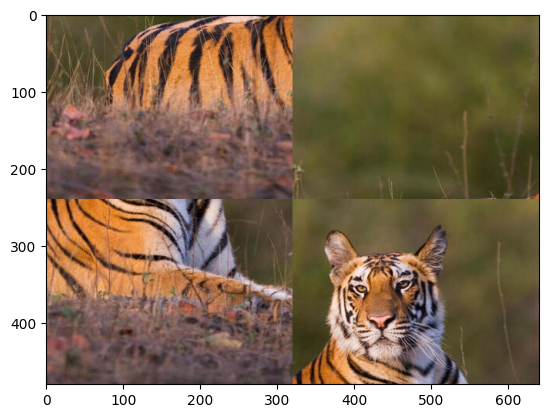

In [12]:
# create a new image
new_image = Image.new('RGB', (width, height))

# paste the shuffled blocks onto the new image
new_image.paste(blocks[0], (0, 0))
new_image.paste(blocks[1], (width//2, 0))
new_image.paste(blocks[2], (0, height//2))
new_image.paste(blocks[3], (width//2, height//2))


plt.imshow(new_image)
# save the reconstructed image
#new_image.save('reconstructed_image.jpg')


In [103]:
np.array(new_image).shape

(480, 640, 3)

640
480
(106, 80)


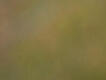

In [30]:
from PIL import Image

# load the image
image = Image.open('Downloads/6aofsvaglm_Medium_WW226365.jpg')

# get the width and height of the image
width, height = image.size
print(width)
print(height)
# calculate the size of each block
block_size = (width//6, height//6)
print(block_size)
# create a list of 36 blocks
blocks = []
index_pos=[]
for row in range(6):
    for col in range(6):
        block = image.crop((col*block_size[0], row*block_size[1], (col+1)*block_size[0], (row+1)*block_size[1]))
        blocks.append(block)
        index_pos.append(str(row)+str(col))
blocks[0]

In [28]:
index_pos

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55']

In [79]:
import random

# shuffle the blocks
random.shuffle(blocks)
blocks


[<PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.Image image mode=RGB size=106x80>,
 <PIL.Image.I

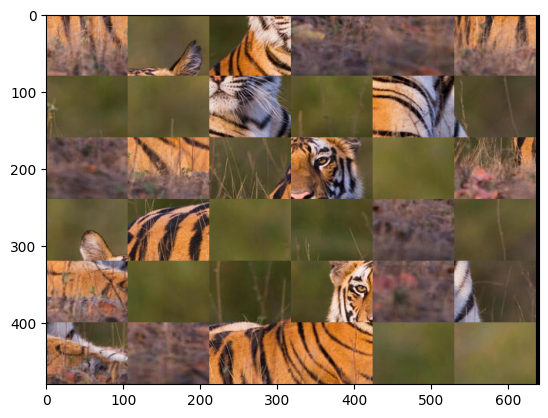

In [15]:
# create a new image
new_image = Image.new('RGB', (width, height))

# paste the shuffled blocks onto the new image
for i, block in enumerate(blocks):
    row = i // 6
    col = i % 6
    new_image.paste(block, (col*block_size[0], row*block_size[1]))
plt.imshow(new_image)
# save the reconstructed image
#new_image.save('reconstructed_image.jpg')


In [241]:
#start from here

In [1]:
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
df = pd.read_csv('Downloads/dataset/train/train_faces.csv')


In [3]:
df

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,hwJUKjziH0.jpg,22,20,14,4,43,40,35,53,25,...,31,41,13,32,33,10,2,30,50,44
1,smzyIVQ4Ve.jpg,3,50,43,14,5,13,33,52,1,...,41,35,45,30,44,22,51,0,32,15
2,IT3H2QbaJY.jpg,55,25,43,10,33,20,22,13,54,...,0,42,11,41,12,23,30,51,35,32
3,Yceag6Ca0B.jpg,12,32,52,5,15,42,55,4,10,...,34,20,13,21,22,45,33,41,23,35
4,nDBcp5ZyPj.jpg,33,44,12,45,50,54,20,24,0,...,55,34,4,25,52,15,11,21,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,18JgpkiDOL.jpg,4,42,34,33,0,1,20,3,30,...,2,21,31,5,10,23,52,40,43,25
95,oSpFCAFQwT.jpg,41,4,3,33,24,42,0,40,34,...,55,23,5,11,50,54,15,44,35,10
96,DXsAm4YNMB.jpg,35,0,33,52,21,23,11,15,30,...,42,31,55,1,45,13,24,53,43,34
97,3HP9T1V8oW.jpg,50,23,22,13,55,43,10,34,45,...,25,40,41,30,52,4,42,44,53,54


In [4]:
df.image

0     hwJUKjziH0.jpg
1     smzyIVQ4Ve.jpg
2     IT3H2QbaJY.jpg
3     Yceag6Ca0B.jpg
4     nDBcp5ZyPj.jpg
           ...      
94    18JgpkiDOL.jpg
95    oSpFCAFQwT.jpg
96    DXsAm4YNMB.jpg
97    3HP9T1V8oW.jpg
98    SiANxfuaTb.jpg
Name: image, Length: 99, dtype: object

In [6]:
from imageio import imread
imread("Downloads/dataset/train/faces/cpfepZKGbz.jpg").shape

/var/folders/nx/znrd6q191271k3609_22qcz40000gn/T/ipykernel_39467/537364291.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imread("Downloads/dataset/train/faces/cpfepZKGbz.jpg").shape


(300, 300, 3)

In [7]:
len(df)

99

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df['image']="Downloads/dataset/train/faces/"+df['image']

In [83]:
np.array(Image.open(df['image'][0]))

array([[[ 78,  49,  35],
        [ 74,  45,  31],
        [ 69,  40,  26],
        ...,
        [ 82,  52,  42],
        [ 83,  54,  46],
        [ 85,  56,  48]],

       [[ 76,  47,  33],
        [ 73,  44,  30],
        [ 68,  39,  25],
        ...,
        [ 83,  53,  43],
        [ 83,  54,  46],
        [ 84,  55,  47]],

       [[ 74,  45,  31],
        [ 71,  42,  28],
        [ 67,  38,  24],
        ...,
        [ 83,  53,  43],
        [ 82,  53,  45],
        [ 82,  53,  45]],

       ...,

       [[182, 131, 138],
        [180, 127, 135],
        [176, 123, 131],
        ...,
        [ 62,  33,  19],
        [ 60,  32,  20],
        [ 59,  31,  19]],

       [[183, 126, 135],
        [184, 127, 136],
        [186, 129, 138],
        ...,
        [ 62,  33,  19],
        [ 60,  32,  20],
        [ 59,  31,  19]],

       [[176, 115, 123],
        [180, 119, 127],
        [185, 124, 132],
        ...,
        [ 61,  32,  18],
        [ 59,  31,  19],
        [ 59,  31,  19]]

In [87]:
#all the images stacked
x = np.array([np.array(Image.open(fname)) for fname in df['image']])
x.shape

(99, 300, 300, 3)

In [88]:
#x=x/255.0
x

array([[[[ 78,  49,  35],
         [ 74,  45,  31],
         [ 69,  40,  26],
         ...,
         [ 82,  52,  42],
         [ 83,  54,  46],
         [ 85,  56,  48]],

        [[ 76,  47,  33],
         [ 73,  44,  30],
         [ 68,  39,  25],
         ...,
         [ 83,  53,  43],
         [ 83,  54,  46],
         [ 84,  55,  47]],

        [[ 74,  45,  31],
         [ 71,  42,  28],
         [ 67,  38,  24],
         ...,
         [ 83,  53,  43],
         [ 82,  53,  45],
         [ 82,  53,  45]],

        ...,

        [[182, 131, 138],
         [180, 127, 135],
         [176, 123, 131],
         ...,
         [ 62,  33,  19],
         [ 60,  32,  20],
         [ 59,  31,  19]],

        [[183, 126, 135],
         [184, 127, 136],
         [186, 129, 138],
         ...,
         [ 62,  33,  19],
         [ 60,  32,  20],
         [ 59,  31,  19]],

        [[176, 115, 123],
         [180, 119, 127],
         [185, 124, 132],
         ...,
         [ 61,  32,  18],
        

In [31]:
df

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,Downloads/dataset/train/faces/hwJUKjziH0.jpg,22,12,10,4,27,24,23,33,17,...,19,25,9,20,21,6,2,18,30,28
1,Downloads/dataset/train/faces/smzyIVQ4Ve.jpg,3,30,27,10,5,9,21,32,1,...,25,23,29,18,28,14,31,0,20,11
2,Downloads/dataset/train/faces/IT3H2QbaJY.jpg,55,17,27,6,21,12,14,9,34,...,0,26,7,25,8,15,18,31,23,20
3,Downloads/dataset/train/faces/Yceag6Ca0B.jpg,12,20,32,5,11,26,35,4,6,...,22,12,9,13,14,29,21,25,15,23
4,Downloads/dataset/train/faces/nDBcp5ZyPj.jpg,33,28,8,29,30,34,12,16,0,...,35,22,4,17,32,11,7,13,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Downloads/dataset/train/faces/18JgpkiDOL.jpg,4,26,22,21,0,1,12,3,18,...,2,13,19,5,6,15,32,24,27,17
95,Downloads/dataset/train/faces/oSpFCAFQwT.jpg,41,4,3,21,16,26,0,24,22,...,35,15,5,7,30,34,11,28,23,6
96,Downloads/dataset/train/faces/DXsAm4YNMB.jpg,35,0,21,32,13,15,7,11,18,...,26,19,35,1,29,9,16,33,27,22
97,Downloads/dataset/train/faces/3HP9T1V8oW.jpg,50,15,14,9,35,27,6,22,29,...,17,24,25,18,32,4,26,28,33,34


In [11]:
#pd.to_numeric(df.columns[1:])

In [12]:
mapped_index=dict(zip(list(range(36)),pd.to_numeric(df.columns[1:]))) 

In [13]:
mapped_index

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 10,
 7: 11,
 8: 12,
 9: 13,
 10: 14,
 11: 15,
 12: 20,
 13: 21,
 14: 22,
 15: 23,
 16: 24,
 17: 25,
 18: 30,
 19: 31,
 20: 32,
 21: 33,
 22: 34,
 23: 35,
 24: 40,
 25: 41,
 26: 42,
 27: 43,
 28: 44,
 29: 45,
 30: 50,
 31: 51,
 32: 52,
 33: 53,
 34: 54,
 35: 55}

In [14]:
og_mapped_ref={value:key for key,value in mapped_index.items()}

In [32]:
og_mapped_ref

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 10: 6,
 11: 7,
 12: 8,
 13: 9,
 14: 10,
 15: 11,
 20: 12,
 21: 13,
 22: 14,
 23: 15,
 24: 16,
 25: 17,
 30: 18,
 31: 19,
 32: 20,
 33: 21,
 34: 22,
 35: 23,
 40: 24,
 41: 25,
 42: 26,
 43: 27,
 44: 28,
 45: 29,
 50: 30,
 51: 31,
 52: 32,
 53: 33,
 54: 34,
 55: 35}

In [33]:
list_of_keys=[keys for keys in og_mapped_ref]
for x in df.columns[1:]:
    for i in list_of_keys:
        if og_mapped_ref[i]:
            df[x]=df[x].replace(i,og_mapped_ref[i])
            
df2=df.copy()

In [34]:
df

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,Downloads/dataset/train/faces/hwJUKjziH0.jpg,14,8,6,4,27,16,15,21,17,...,19,17,9,12,13,6,2,18,18,28
1,Downloads/dataset/train/faces/smzyIVQ4Ve.jpg,3,18,27,6,5,9,13,20,1,...,17,15,29,18,28,10,19,0,12,7
2,Downloads/dataset/train/faces/IT3H2QbaJY.jpg,35,17,27,6,13,8,10,9,22,...,0,26,7,17,8,11,18,19,15,12
3,Downloads/dataset/train/faces/Yceag6Ca0B.jpg,8,12,20,5,7,26,23,4,6,...,14,8,9,9,10,29,13,17,11,15
4,Downloads/dataset/train/faces/nDBcp5ZyPj.jpg,21,28,8,29,18,22,8,16,0,...,23,14,4,17,20,7,7,9,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Downloads/dataset/train/faces/18JgpkiDOL.jpg,4,26,14,13,0,1,8,3,18,...,2,9,19,5,6,11,20,16,27,17
95,Downloads/dataset/train/faces/oSpFCAFQwT.jpg,25,4,3,13,16,26,0,16,14,...,23,11,5,7,18,22,7,28,15,6
96,Downloads/dataset/train/faces/DXsAm4YNMB.jpg,23,0,13,20,9,11,7,7,18,...,26,19,23,1,29,9,16,21,27,14
97,Downloads/dataset/train/faces/3HP9T1V8oW.jpg,30,11,10,9,23,27,6,14,29,...,17,16,17,18,20,4,26,28,21,22


In [40]:
df2.columns=['image']+list(range(36))

In [38]:
input2=np.array(df2.loc[:,"00":])

In [41]:
df2

,image,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,Downloads/dataset/train/faces/hwJUKjziH0.jpg,14,8,6,4,27,16,15,21,17,...,19,17,9,12,13,6,2,18,18,28
1,Downloads/dataset/train/faces/smzyIVQ4Ve.jpg,3,18,27,6,5,9,13,20,1,...,17,15,29,18,28,10,19,0,12,7
2,Downloads/dataset/train/faces/IT3H2QbaJY.jpg,35,17,27,6,13,8,10,9,22,...,0,26,7,17,8,11,18,19,15,12
3,Downloads/dataset/train/faces/Yceag6Ca0B.jpg,8,12,20,5,7,26,23,4,6,...,14,8,9,9,10,29,13,17,11,15
4,Downloads/dataset/train/faces/nDBcp5ZyPj.jpg,21,28,8,29,18,22,8,16,0,...,23,14,4,17,20,7,7,9,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Downloads/dataset/train/faces/18JgpkiDOL.jpg,4,26,14,13,0,1,8,3,18,...,2,9,19,5,6,11,20,16,27,17
95,Downloads/dataset/train/faces/oSpFCAFQwT.jpg,25,4,3,13,16,26,0,16,14,...,23,11,5,7,18,22,7,28,15,6
96,Downloads/dataset/train/faces/DXsAm4YNMB.jpg,23,0,13,20,9,11,7,7,18,...,26,19,23,1,29,9,16,21,27,14
97,Downloads/dataset/train/faces/3HP9T1V8oW.jpg,30,11,10,9,23,27,6,14,29,...,17,16,17,18,20,4,26,28,21,22


In [39]:
input2

array([[14,  8,  6, ..., 18, 18, 28],
       [ 3, 18, 27, ...,  0, 12,  7],
       [35, 17, 27, ..., 19, 15, 12],
       ...,
       [23,  0, 13, ..., 21, 27, 14],
       [30, 11, 10, ..., 28, 21, 22],
       [29, 19,  7, ..., 13, 23, 18]])

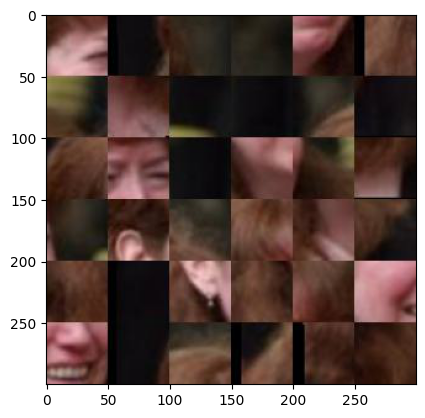

In [26]:
#all_in _one images
import matplotlib.pyplot as plt
plt.imshow(x[0])

In [27]:
# # create an empty list to store the images
# image_list = []
# for index, row in df.iterrows():
#     # read image file from the path in the DataFrame
#     img = Image.open(row['image'])
#     # perform any required image processing here
#     # ...
#     # add the processed image to the list
#     image_list.append(img)

# # convert the list to a NumPy array for further processing
# image_array = np.array(image_list)

# image_array[2]

In [130]:
df

,image,00,01,02,03,04,05,10,11,12,...,42,43,44,45,50,51,52,53,54,55
0,Downloads/dataset/train/faces/hwJUKjziH0.jpg,22,20,14,4,43,40,35,53,25,...,31,41,13,32,33,10,2,30,50,44
1,Downloads/dataset/train/faces/smzyIVQ4Ve.jpg,3,50,43,14,5,13,33,52,1,...,41,35,45,30,44,22,51,0,32,15
2,Downloads/dataset/train/faces/IT3H2QbaJY.jpg,55,25,43,10,33,20,22,13,54,...,0,42,11,41,12,23,30,51,35,32
3,Downloads/dataset/train/faces/Yceag6Ca0B.jpg,12,32,52,5,15,42,55,4,10,...,34,20,13,21,22,45,33,41,23,35
4,Downloads/dataset/train/faces/nDBcp5ZyPj.jpg,33,44,12,45,50,54,20,24,0,...,55,34,4,25,52,15,11,21,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Downloads/dataset/train/faces/18JgpkiDOL.jpg,4,42,34,33,0,1,20,3,30,...,2,21,31,5,10,23,52,40,43,25
95,Downloads/dataset/train/faces/oSpFCAFQwT.jpg,41,4,3,33,24,42,0,40,34,...,55,23,5,11,50,54,15,44,35,10
96,Downloads/dataset/train/faces/DXsAm4YNMB.jpg,35,0,33,52,21,23,11,15,30,...,42,31,55,1,45,13,24,53,43,34
97,Downloads/dataset/train/faces/3HP9T1V8oW.jpg,50,23,22,13,55,43,10,34,45,...,25,40,41,30,52,4,42,44,53,54


In [129]:
300//6

50

In [231]:
image_shape = (300, 300, 3)

subimages = np.random.rand(36, *image_shape)


300 300 3


In [180]:
subimages[[1,3]].shape

(2, 300, 300, 3)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape of each subimage
image_shape = (300, 300, 3)

# Define the model architecture
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=image_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(36,activation="softmax")
])

# Define the loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# Define a function to shuffle a sequence of indices
# def shuffle_indices(indices):
#     shuffled_indices = np.random.permutation(indices)
#     while np.array_equal(indices, shuffled_indices):
#         shuffled_indices = np.random.permutation(indices)
#     return shuffled_indices

# # Define a function to generate training examples
# def generate_training_example():
#     # Generate a sequence of 36 random indices
#     indices = np.arange(36)
#     np.random.shuffle(indices)
#     # Generate a sequence of 36 subimages
#     subimages = np.random.rand(36, *subimage_shape)
#     # Shuffle the indices to create a jumbled sequence
#     jumbled_indices = shuffle_indices(indices)
#     # Return the jumbled sequence and the correct sequence
#     return subimages[jumbled_indices], indices

# Define the training loop
@tf.function
def train_step(images, indices):
    with tf.GradientTape() as tape:
        # Make predictions
        logits = model(images, training=True)
        # Compute the loss
        loss = loss_fn(indices, logits)
    # Compute the gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    # Update the model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    # Compute the accuracy
    predictions = tf.argmax(logits, axis=-1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, indices), tf.float32))
    return loss, accuracy

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    # Generate a batch of training examples
    images_batch = []
    indices_batch = []
    for i in range(32):
        #subimages, indices = generate_training_example()
        subimages_batch.append(image)
        indices_batch.append(indices)
    subimages_batch = np.array(subimages_batch)
    indices_batch = np.array(indices_batch)
    # Train on the batch
    loss, accuracy = train_step(x, )
    # Print the progress
    print('Epoch', epoch + 1, 'Loss', loss.numpy(), 'Accuracy', accuracy.numpy())


In [236]:
input2[0]

array([14,  8,  6,  4, 27, 16,  7,  9, 17,  7,  1, 11,  7,  7,  5, 26,  6,
       10, 16,  9,  3,  8,  8, 29, 19,  0, 19, 17,  9,  8,  9,  6,  2, 18,
       18, 28])

In [237]:
input2

array([[14,  8,  6, ..., 18, 18, 28],
       [ 3, 18, 27, ...,  0,  8,  7],
       [35, 17, 27, ..., 19,  7,  8],
       ...,
       [23,  0,  9, ...,  9, 27,  6],
       [30,  7,  6, ..., 28,  9, 10],
       [29, 19,  7, ...,  9, 11, 18]])

In [48]:
x

array([[[[1.19953864e-03, 7.53556324e-04, 5.38254517e-04],
         [1.13802384e-03, 6.92041522e-04, 4.76739715e-04],
         [1.06113033e-03, 6.15148020e-04, 3.99846213e-04],
         ...,
         [1.26105344e-03, 7.99692426e-04, 6.45905421e-04],
         [1.27643214e-03, 8.30449827e-04, 7.07420223e-04],
         [1.30718954e-03, 8.61207228e-04, 7.38177624e-04]],

        [[1.16878124e-03, 7.22798923e-04, 5.07497116e-04],
         [1.12264514e-03, 6.76662822e-04, 4.61361015e-04],
         [1.04575163e-03, 5.99769319e-04, 3.84467512e-04],
         ...,
         [1.27643214e-03, 8.15071126e-04, 6.61284121e-04],
         [1.27643214e-03, 8.30449827e-04, 7.07420223e-04],
         [1.29181084e-03, 8.45828527e-04, 7.22798923e-04]],

        [[1.13802384e-03, 6.92041522e-04, 4.76739715e-04],
         [1.09188774e-03, 6.45905421e-04, 4.30603614e-04],
         [1.03037293e-03, 5.84390619e-04, 3.69088812e-04],
         ...,
         [1.27643214e-03, 8.15071126e-04, 6.61284121e-04],
         [

In [135]:
#input1 is images and input2 is 36 indices
input1=x
input2

array([[14,  8,  6, ..., 18, 18, 28],
       [ 3, 18, 27, ...,  0, 12,  7],
       [35, 17, 27, ..., 19, 15, 12],
       ...,
       [23,  0, 13, ..., 21, 27, 14],
       [30, 11, 10, ..., 28, 21, 22],
       [29, 19,  7, ..., 13, 23, 18]])

In [54]:
input1.shape

(99, 300, 300, 3)

In [53]:
input2.shape

(99, 36)

In [ ]:
from tensorflow.keras.applications import vgg16

In [60]:
input1.shape

(99, 300, 300, 3)

In [96]:
# input1=tf.convert_to_tensor(input1)
# #input1=tf.reshape(input1,(99,224,224,3))
# input1

In [ ]:
# Get a batch of jumbled subimages and corresponding indices
#x_test, y_test = next(test_generator)

# Make predictions on the jumbled subimages
y_pred = model.predict(x_test)

# Get the predicted indices for each subimage
predicted_indices = np.argmax(y_pred, axis=1)

# Print the predicted indices and true indices for each subimage
for i in range(len(predicted_indices)):
    print("Subimage {}: predicted index={}, true index={}".format(i+1, predicted_indices[i], y_test[i]))


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the siamese-ennead CNN model
input_shape = (64, 64, 3)
num_subimages = 36

input_jumbled = keras.Input(shape=(num_subimages,) + input_shape, name='input_jumbled')
input_indices = keras.Input(shape=(num_subimages,), name='input_indices')

# Define the CNN layers
conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
maxpool1 = layers.MaxPooling2D((2, 2))
conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')
maxpool2 = layers.MaxPooling2D((2, 2))
conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')
maxpool3 = layers.MaxPooling2D((2, 2))

# Apply the CNN layers to the jumbled subimages
x = input_jumbled
for layer in [conv1, maxpool1, conv2, maxpool2, conv3, maxpool3]:
    x = layer(x)

# Flatten the output of the CNN layers
x = layers.Flatten()(x)

# Concatenate the output of the CNN layers with the input indices
x = layers.concatenate([x, input_indices])

# Define the fully connected layers
fc1 = layers.Dense(512, activation='relu')
fc2 = layers.Dense(num_subimages, activation='softmax')

# Apply the fully connected layers to the concatenated input
x = fc1(x)
x = fc2(x)

# Define the model with two inputs and one output
model = keras.Model(inputs=[input_jumbled, input_indices], outputs=x)

# Define the loss function and optimizer
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the model
num_epochs = 10
batch_size = 32
steps_per_epoch = 100

for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch + 1, num_epochs))
    
    for step in range(steps_per_epoch):
        # Get a batch of jumbled subimages and corresponding original indices
        x_train, y_train_orig = next(train_generator)
        
        # Jumble the subimages
        x_train_jumbled, y_train_jumbled = jumble_subimages(x_train, y_train_orig)
        
        # Train the model on the jumbled subimages and their corresponding original indices
        loss, acc = model.train_on_batch([x_train_jumbled, y_train_jumbled], y_train_orig)
        
        # Print the loss and accuracy
        if step % 10 == 0:
            print('Step {}: loss = {}, accuracy = {}'.format(step, loss, acc))


In [76]:
input1.dtype

dtype('float64')

In [78]:
input1

array([[[[1.19953864e-03, 7.53556324e-04, 5.38254517e-04],
         [1.13802384e-03, 6.92041522e-04, 4.76739715e-04],
         [1.06113033e-03, 6.15148020e-04, 3.99846213e-04],
         ...,
         [1.26105344e-03, 7.99692426e-04, 6.45905421e-04],
         [1.27643214e-03, 8.30449827e-04, 7.07420223e-04],
         [1.30718954e-03, 8.61207228e-04, 7.38177624e-04]],

        [[1.16878124e-03, 7.22798923e-04, 5.07497116e-04],
         [1.12264514e-03, 6.76662822e-04, 4.61361015e-04],
         [1.04575163e-03, 5.99769319e-04, 3.84467512e-04],
         ...,
         [1.27643214e-03, 8.15071126e-04, 6.61284121e-04],
         [1.27643214e-03, 8.30449827e-04, 7.07420223e-04],
         [1.29181084e-03, 8.45828527e-04, 7.22798923e-04]],

        [[1.13802384e-03, 6.92041522e-04, 4.76739715e-04],
         [1.09188774e-03, 6.45905421e-04, 4.30603614e-04],
         [1.03037293e-03, 5.84390619e-04, 3.69088812e-04],
         ...,
         [1.27643214e-03, 8.15071126e-04, 6.61284121e-04],
         [

In [90]:
from PIL import Image
import numpy as np

# Load the batch of images as a numpy array
images = input1

# Define the new height and width
new_height, new_width = 224, 224

# Resize each image in the batch
resized_images = np.zeros((99, new_height, new_width, 3))
for i in range(99):
    img = Image.fromarray(images[i])
    img = img.resize((new_width, new_height), Image.BILINEAR)
    resized_images[i] = np.array(img)

# Check the shape of the resized images
print(resized_images.shape)  # Output: (32, 128, 128, 3)


(99, 224, 224, 3)


In [92]:
resized_images=resized_images/255.0

In [103]:
input1=resized_images
input2


array([[14,  8,  6, ..., 18, 18, 28],
       [ 3, 18, 27, ...,  0, 12,  7],
       [35, 17, 27, ..., 19, 15, 12],
       ...,
       [23,  0, 13, ..., 21, 27, 14],
       [30, 11, 10, ..., 28, 21, 22],
       [29, 19,  7, ..., 13, 23, 18]])

In [109]:
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16

In [130]:
#another technique
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from keras.models import Model



# Define input shapes
input_shape_1 = (224, 224, 3) # shape of the input subimage
#input_shape_2 = (36,) # shape of the input indices



#input1=tf.reshape(input1,(99,224,224,3))
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False


model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128,activation='relu'),

    tf.keras.layers.Dense(36,activation='linear')
])
#input_2 = Input(shape=input_shape_2, name='input_2')
# # Define the first convolutional block
# x1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(input_1)
# x1 = MaxPooling2D(pool_size=(2,2))(x1)

# # Define the second convolutional block
# x1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x1)
# x1 = MaxPooling2D(pool_size=(2,2))(x1)

# # Define the third convolutional block
# x1 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x1)
# x1 = MaxPooling2D(pool_size=(2,2))(x1)

# Flatten the feature maps from the convolutional layers
#x1 = Flatten()(x1)

# Concatenate the flattened feature maps with the input indices
#x2 = Concatenate()([x1, input_2])

# # Define the fully connected layers
# x1 = Dense(256, activation='relu')(x1)
# x1 = Dense(128, activation='relu')(x1)
# output_layer = Dense(36, activation='relu')(x1)


# Define the Siamese-Ennead CNN model
#model = Model(inputs=[input_1], outputs=output_layer)
model.compile(loss="mse", optimizer="adam",metrics=['acc'])
model.fit(input1,input2,epochs=50)



Epoch 1/50


2023-03-03 10:43:29.578934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 5s 958ms/step - loss: 232.1544 - acc: 0.0202
Epoch 2/50
4/4 [==============================] - 3s 767ms/step - loss: 140.9904 - acc: 0.1111
Epoch 3/50
4/4 [==============================] - 3s 737ms/step - loss: 104.4475 - acc: 0.1616
Epoch 4/50
4/4 [==============================] - 3s 802ms/step - loss: 97.4053 - acc: 0.1515
Epoch 5/50
4/4 [==============================] - 3s 713ms/step - loss: 83.5092 - acc: 0.1212
Epoch 6/50
4/4 [==============================] - 3s 719ms/step - loss: 79.1014 - acc: 0.1616
Epoch 7/50
4/4 [==============================] - 3s 717ms/step - loss: 73.4331 - acc: 0.1111
Epoch 8/50
4/4 [==============================] - 3s 707ms/step - loss: 69.3845 - acc: 0.1515
Epoch 9/50
4/4 [==============================] - 3s 715ms/step - loss: 70.3377 - acc: 0.1717
Epoch 10/50
4/4 [==============================] - 3s 709ms/step - loss: 65.7246 - acc: 0.2020
Epoch 11/50
4/4 [==============================] - 3s 711ms/step - 

KeyboardInterrupt: 

In [121]:
# Loading the dataset

from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels)= cifar10.load_data()

# Labels before applying the function
# Training set labels
print(train_labels)
print(train_labels.shape)

# Testing set labels
print(test_labels)
print(test_labels.shape)

# Applying the function to training set labels and testing set labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, dtype ="uint8")
test_labels = to_categorical(test_labels, dtype ="uint8")

# Labels after applying the function
# Training set labels
print(train_labels)
print(train_labels.shape)

# Testing set labels
print(test_labels)
print(test_labels.shape)


[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
(10000, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(50000, 10)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
(10000, 10)


In [131]:
x.shape

(99, 300, 300, 3)

In [133]:
df2['image']

0     Downloads/dataset/train/faces/hwJUKjziH0.jpg
1     Downloads/dataset/train/faces/smzyIVQ4Ve.jpg
2     Downloads/dataset/train/faces/IT3H2QbaJY.jpg
3     Downloads/dataset/train/faces/Yceag6Ca0B.jpg
4     Downloads/dataset/train/faces/nDBcp5ZyPj.jpg
                          ...                     
94    Downloads/dataset/train/faces/18JgpkiDOL.jpg
95    Downloads/dataset/train/faces/oSpFCAFQwT.jpg
96    Downloads/dataset/train/faces/DXsAm4YNMB.jpg
97    Downloads/dataset/train/faces/3HP9T1V8oW.jpg
98    Downloads/dataset/train/faces/SiANxfuaTb.jpg
Name: image, Length: 99, dtype: object

In [ ]:
for row in range(6):
    for col in range(6):
        

In [161]:
#2 input 3d arrays

m=np.array([[[1,2,3],
			[4,5,6],
			[7,8,9]],

			[[10,11,12],
			[13,14,15],
			[16,17,18]]])

n=np.array([[[51,52,53],
			[54,55,56],
			[57,58,59]],

			[[110,111,112],
			[113,114,115],
			[116,117,118]]])
n.shape
# stacking
#np.stack((m,n),axis=0)

(36,50,50,3)

(36, 50, 50, 3)

In [162]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({'col1': [1, 2, 3, 4], 'col2': [5, 6, 7, 8]})

# shuffle the rows
shuffled_df = df.sample(frac=1).reset_index(drop=True)

print(shuffled_df)


   col1  col2
0     3     7
1     4     8
2     2     6
3     1     5


In [168]:
import numpy as np

# Create the numpy array
X = np.random.rand(99, 36, 50, 50, 3)

# Define the indices of the subsets you want to extract
subset_indices = [0, 1, 2, 3, 4] # for example, extract the first 5 subsets

# Extract the subsets using indexing
X_subsets = X[:10],

# Print the shape of the subsets
print(X_subsets.shape) # prints (5, 36, 50, 50, 3)


(10, 36, 50, 50, 3)


In [1]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Create the numpy array
X = np.random.rand(3000, 36, 50, 50, 3)

# Define the number of folds
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True)

# Define the neural network architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Loop over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}/{k}")
    print(len(train_index))
    print(len(val_index))
    
#     # Split the data into training and validation sets for this fold
#     X_train, y_train = X[train_index], y[train_index] # replace y with your target variable
#     X_val, y_val = X[val_index], y[val_index] # replace y with your target variable
    
#     # Train the model on the training set
#     model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
    
#     # Evaluate the model on the validation set
#     loss, accuracy = model.evaluate(X_val, y_val)
#     print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


2023-03-06 17:44:16.511094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-06 17:44:16.512488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Fold 1/5
2400
600
Fold 2/5
2400
600
Fold 3/5
2400
600
Fold 4/5
2400
600
Fold 5/5
2400
600
